In [1]:
# Add python modules
import numpy as np
import matplotlib.pyplot as plt

# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as simr
gm = simr.gm
im = simr.im
ic = simr.ic
ms = simr.ms
sa = simr.sa
dc = simr.ms.dc

simr.test()
gm.test()
im.test()
ic.test()
ms.test()
dc.test()
sa.test()

SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew Ogden's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


In [2]:
#tDir = '/home/mbo2d/galStuff/spam_data_pl3/587722984435351614/' 
tDir = '../targetDir'
#tDir = '../../1237678620102623480/'

print(gm.validPath(tDir))
tInfo = im.target_info_class( targetDir = tDir, printAll=True)

if tInfo.status == False:
    print("WARNING")
else:
    print("Target Good!")

/home/mbo2d/587722984435351614/
IM: target_info_class.__init__:
	 - targetDir:  ../targetDir
IM: Target.initTargetDir():
	 - targetDir: ../targetDir
NEW PATH EXISTS: /home/mbo2d/587722984435351614/zoo_merger_models/
	 - targetDir: (True) /home/mbo2d/587722984435351614/
	 - infoDir: (True) /home/mbo2d/587722984435351614/information/
	 - baseInfoLoc: (True) /home/mbo2d/587722984435351614/information/base_target_info.json
	 - allInfoLoc: (True) /home/mbo2d/587722984435351614/information/target_info.json
	 - zooMergerDir: (True) /home/mbo2d/587722984435351614/zoo_merger_models/
	 - plotDir: (True) /home/mbo2d/587722984435351614/plots/
IM: Target: Opening target info json
Target Good!


In [3]:

print(tInfo.get('zoo_merger_models').get('00001'))

rId = 'r00001'
runArg = gm.inArgClass()
runArg.setArg("printAll",True)
runArg.setArg("tInfo",tInfo)

rInfo = tInfo.getRunInfo( rID=rId, rArg = runArg )
rInfo.tInfo = tInfo

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))
    print(rInfo.get('tInfo').status)

None
IM: run_info_class.__init__
	 - runDir:  /home/mbo2d/587722984435351614/zoo_merger_models/run_00001/
IM: run.initRunDir
	 - runDir: /home/mbo2d/587722984435351614/zoo_merger_models/run_00001/
	 - runDir: (True) /home/mbo2d/587722984435351614/zoo_merger_models/run_00001/
	 - ptsDir: (True) /home/mbo2d/587722984435351614/zoo_merger_models/run_00001/particle_files/
	 - imgDir: (True) /home/mbo2d/587722984435351614/zoo_merger_models/run_00001/model_images/
	 - miscDir: (True) /home/mbo2d/587722984435351614/zoo_merger_models/run_00001/misc_images/
	 - infoLoc: (True) /home/mbo2d/587722984435351614/zoo_merger_models/run_00001/info.json
	 - baseLoc: (True) /home/mbo2d/587722984435351614/zoo_merger_models/run_00001/base_info.json
	 - Reading Info file.
IM: Run.__init__: Initalized: True
Run 'r00001' Good!
True


In [4]:
# If you need to create a brand new json score parameter
from copy import deepcopy
pLoc = gm.validPath('../param/new_score.json')
print(pLoc,'\n')
oldParams = im.group_score_parameter_class(pLoc = pLoc)
params = oldParams.group
gm.pprint(params)

params['new_score'] = deepcopy( params['new_score'] )
params['new_score']['name'] = 'new_score'
params['new_score']['cmpArg']['cmpMethod'] = 'test_compare'
gm.pprint(params)

newParams = im.group_score_parameter_class( params = params )
#newParams.saveParam( saveLoc = '../param/new_score.json')


/mnt/c/Users/ogden/OneDrive/Desktop/galStuff/galaxyJSPAM/param/new_score.json 

{'new_score': {'cmpArg': {'cmpMethod': 'test_compare'},
               'imgArg': {'name': 'default',
                          'pType': 'default'},
               'name': 'new_score',
               'scoreType': 'target',
               'simArg': {'nPts': '100k',
                          'name': '100k'},
               'targetName': 'zoo'}}
{'new_score': {'cmpArg': {'cmpMethod': 'test_compare'},
               'imgArg': {'name': 'default',
                          'pType': 'default'},
               'name': 'new_score',
               'scoreType': 'target',
               'simArg': {'nPts': '100k',
                          'name': '100k'},
               'targetName': 'zoo'}}


In [5]:
pLoc = gm.validPath('../param/new_score.json')
print(pLoc,'\n')
newParam = im.group_score_parameter_class(pLoc = pLoc)
if newParam.status == True:
    new_params = newParam.group
    gm.pprint(params)
    print("New Score Params Good!")
else:
    print("Failed to load new params")

/mnt/c/Users/ogden/OneDrive/Desktop/galStuff/galaxyJSPAM/param/new_score.json 

{'new_score': {'cmpArg': {'cmpMethod': 'test_compare'},
               'imgArg': {'name': 'default',
                          'pType': 'default'},
               'name': 'new_score',
               'scoreType': 'target',
               'simArg': {'nPts': '100k',
                          'name': '100k'},
               'targetName': 'zoo'}}
New Score Params Good!


IM: Loading imgLoc: default False


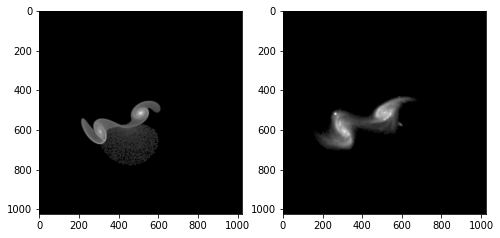

In [6]:
img1 = rInfo.getModelImg( params['new_score']['imgArg']['name'] )
img2 = tInfo.getTargetImage( params['new_score']['targetName'] )

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(img1, cmap='gray')
plt.subplot(122)
plt.imshow(img2, cmap='gray')

In [7]:
# Test new scoring method on 2 images directly
from skimage.metrics import structural_similarity as ssim

def score_ssim( img1, img2, cmpArg ):
    score = -1
    score = ssim( img1, img2 )
    return score

score = score_ssim( img1, img2, None )

print(score)

0.9128633914893991


In [8]:
# Assign new function to test function in direct image compare
dc.set_test_compare(score_ssim)

# Check if all modules loaded the same function
print("All should match")
print('nb:   ',score_ssim)
print('dc:   ',dc.test_compare)
print('ms:   ',ms.dc.test_compare)
print('simr: ',simr.ms.dc.test_compare)


New Score Function:  <function score_ssim at 0x7f2e3a02d670>
All should match
nb:    <function score_ssim at 0x7f2e3a02d670>
dc:    <function score_ssim at 0x7f2e3a02d670>
ms:    <function score_ssim at 0x7f2e3a02d670>
simr:  <function score_ssim at 0x7f2e3a02d670>


In [9]:
newRunScoreArg = gm.inArgClass()
newRunScoreArg.setArg( 'rInfo', rInfo )
newRunScoreArg.setArg( 'scoreParams', new_params )
newRunScoreArg.setArg( 'printAll', True )
newRunScoreArg.setArg( 'newScore', True )
newRunScoreArg.setArg( 'overWrite', True )

simr.simr_run( rInfo = rInfo, arg = newRunScoreArg )
#print(rInfo.get('machine_scores'))

SIMR.pipelineRun: Inputs
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.pipelineRun: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7f2e90430ca0>
MS: Run:
MS: scoreName: new_score
MS: target_image_compare: new_score
	 -  paramName: new_score
	 -  modelName: default
	 - targetName: zoo
	 - Read target image
IM: Loading imgLoc: default False
MS: run: Read model image
IM: Run.saveInfoFile: Saving info data file...
MS: New Score!: new_score - 0.912863 - 0.912863


SIMR: pipelineTarget: input
	 - tDir: None
	 - tInfo: <class 'NoneType'>
SIMR: simr_target status:
	 - tInfo.status: True
SIMR: new_target_scores:
	 - tInfo: True
	 - Runs needing scores: 1
Process-4 - queue empty
Process-5 - queue empty
Process-6 - queue empty
Process-7 - queue empty
Process-8 - queue empty
Process-9 - queue empty
Process-3 - queue empty
IM: Target.gatherRunInfos.
GM: Printing Input arguments
	- printBase - <class 'bool'> :  True
	- printAll - <class 'bool'> :  False
	- nProc - <class 'int'> :  -1
	- simple - <class 'bool'> :  False
	- runDir - <class 'NoneType'> :  None
	- sdssDir - <class 'NoneType'> :  None
	- targetDir - <class 'NoneType'> :  None
	- dataDir - <class 'NoneType'> :  None
Process-15 - queue emptyProcess-10 - queue empty

Process-12 - queue empty
Process-14 - queue emptyProcess-11 - queue emptyProcess-13 - queue empty

Process-16 - queue empty

IM: Target.saveInfoFile():
	 - Saving target info file...
IM: Target.saveInfoFile():
	 - Saving target info

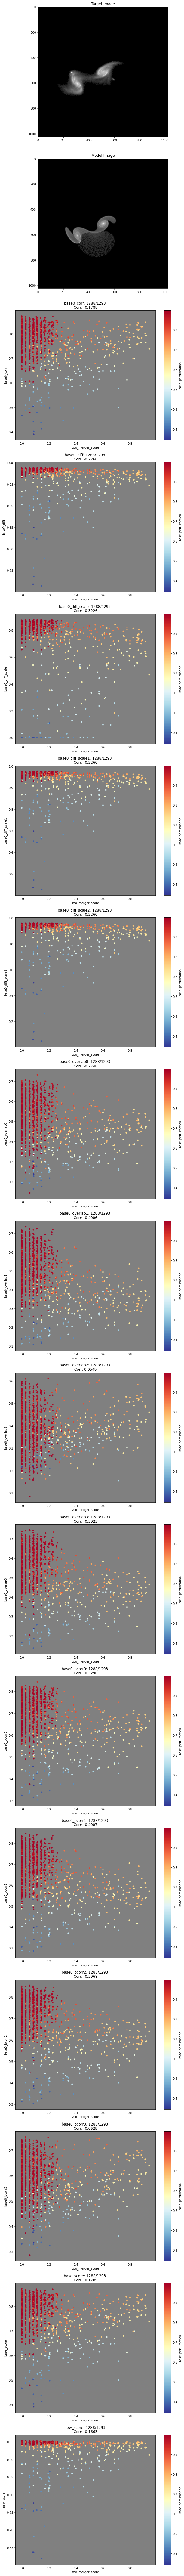

In [10]:
newTarget = gm.inArgClass()
newTarget.setArg( 'tInfo', tInfo )
newTarget.setArg( 'paramLoc', '../param/new_score.json' )
newTarget.setArg( 'printAll', False )
#newTarget.setArg( 'newScore', True )
#newTarget.setArg( 'overWrite', True )

simr.simr_target( arg=newTarget )

<AxesSubplot:title={'center':'new_score:\nCorr: -0.1663'}, xlabel='zoo_merger_score', ylabel='new_score'>

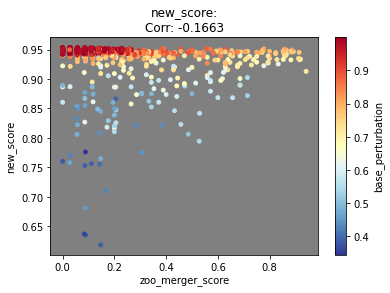

In [11]:
scores = tInfo.getScores()
sa.getNamedPlot(scores)